In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import mglearn
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
%matplotlib inline

Text(0, 0.5, 'Signal')

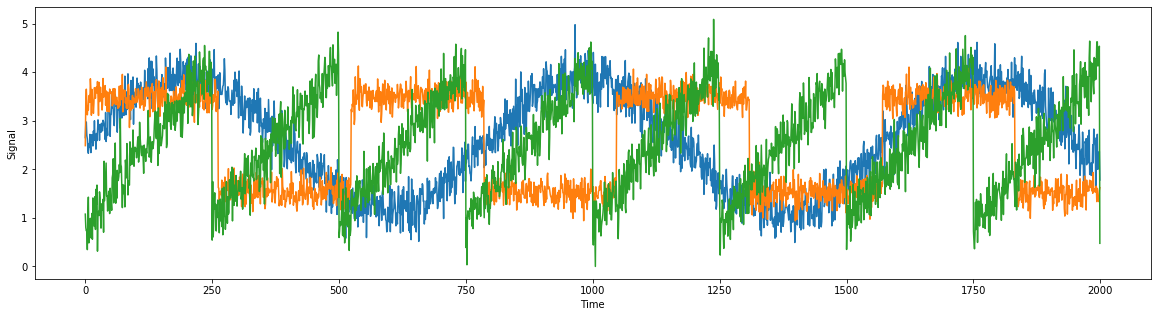

In [19]:
###3 signals
S = mglearn.datasets.make_signals()
plt.figure(figsize=(20, 5))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [7]:
###Imagine we have 100 measuring instruments that give us a series of measurements
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Measurement form: {}".format(X.shape))

Measurement form: (2000, 100)


In [8]:
###Recovery with NMF
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)

In [9]:
###Recovery with PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)

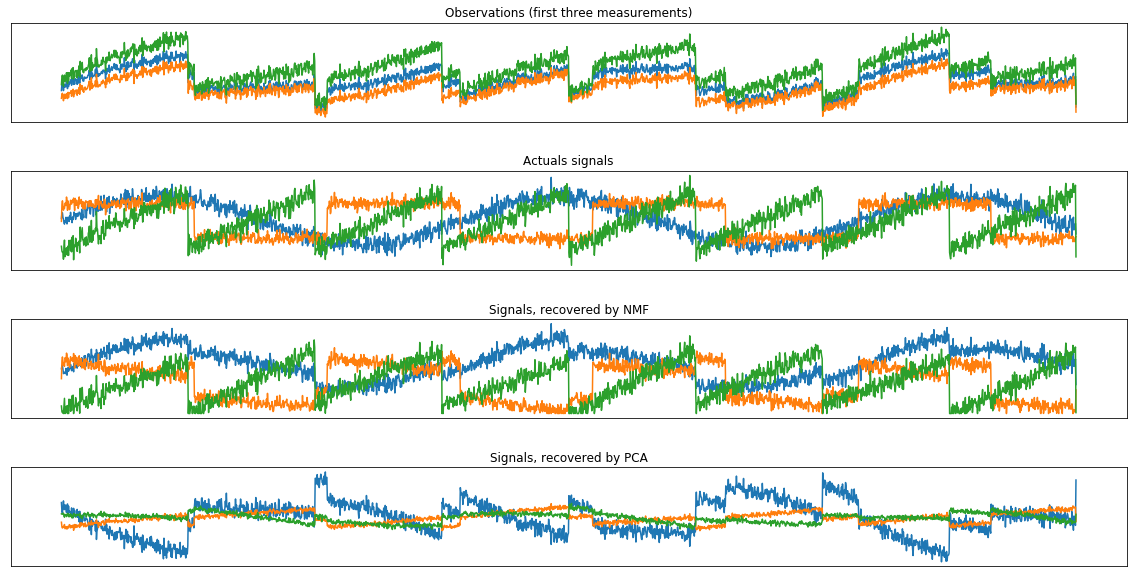

In [24]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'Actuals signals',
         'Signals, recovered by NMF',
         'Signals, recovered by PCA']

fig, axes = plt.subplots(4, figsize=(20, 10), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')